<a href="https://colab.research.google.com/github/TaniaNaum/-/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Загрузка данных
iris = load_iris ()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['iris_class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_class           0
dtype: int64

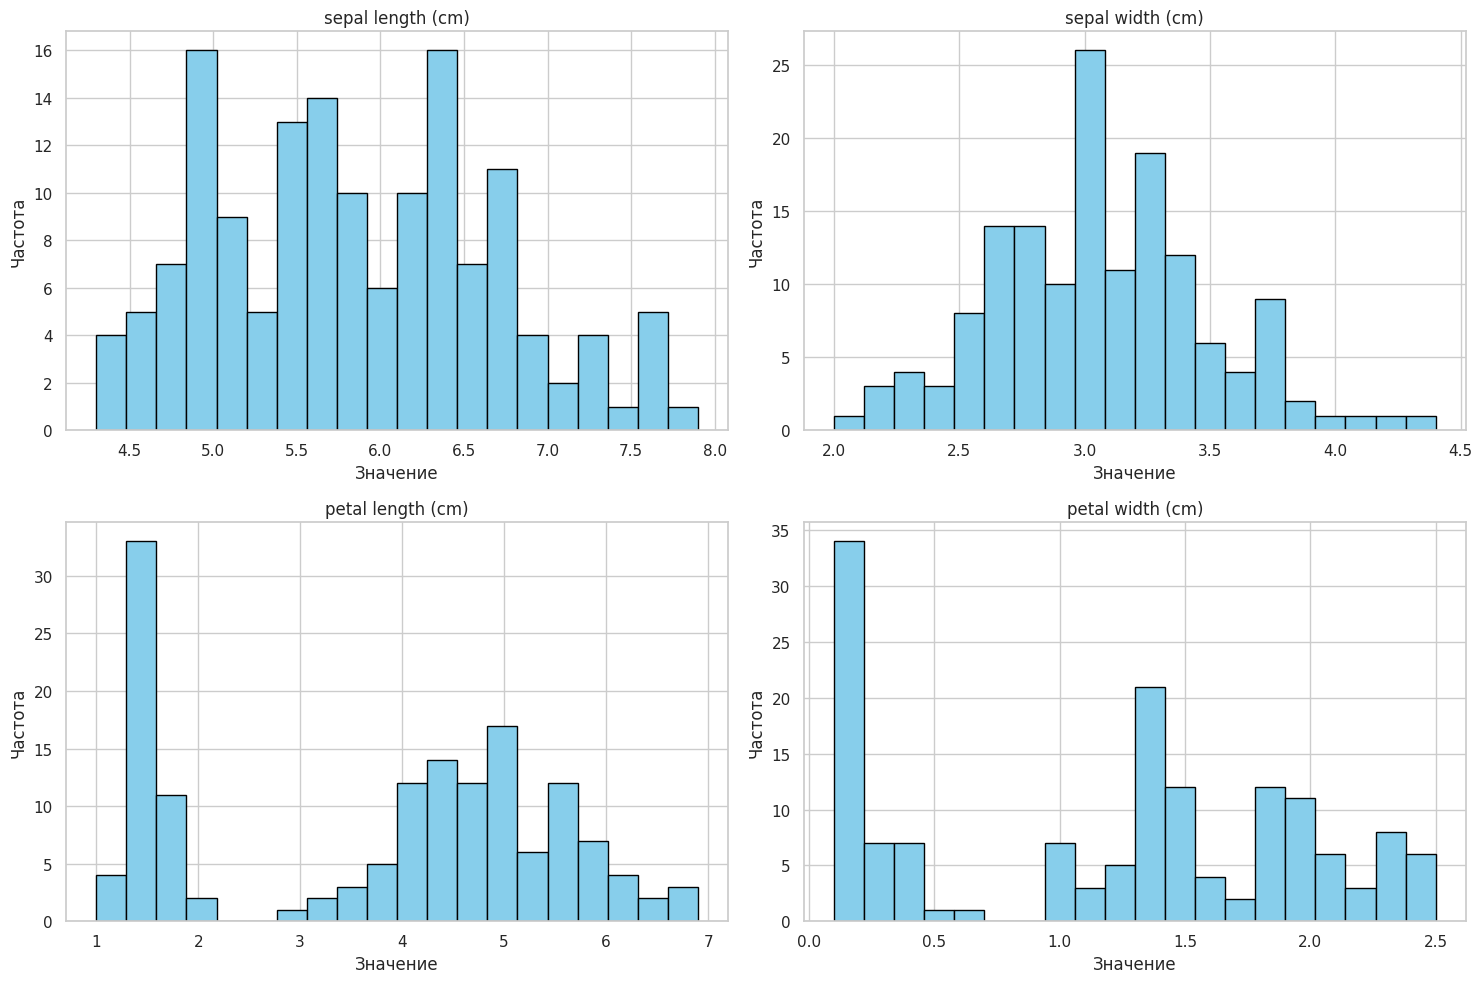

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля Seaborn для красивых графиков
sns.set(style="whitegrid")

# Создание гистограмм для каждой числовой переменной
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')

# Добавление названий для каждого графика и осей
for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('wine_class', 'Класс вина'))

# Регулировка макета для предотвращения наложения подписей
plt.tight_layout()

# Показать график
plt.show()

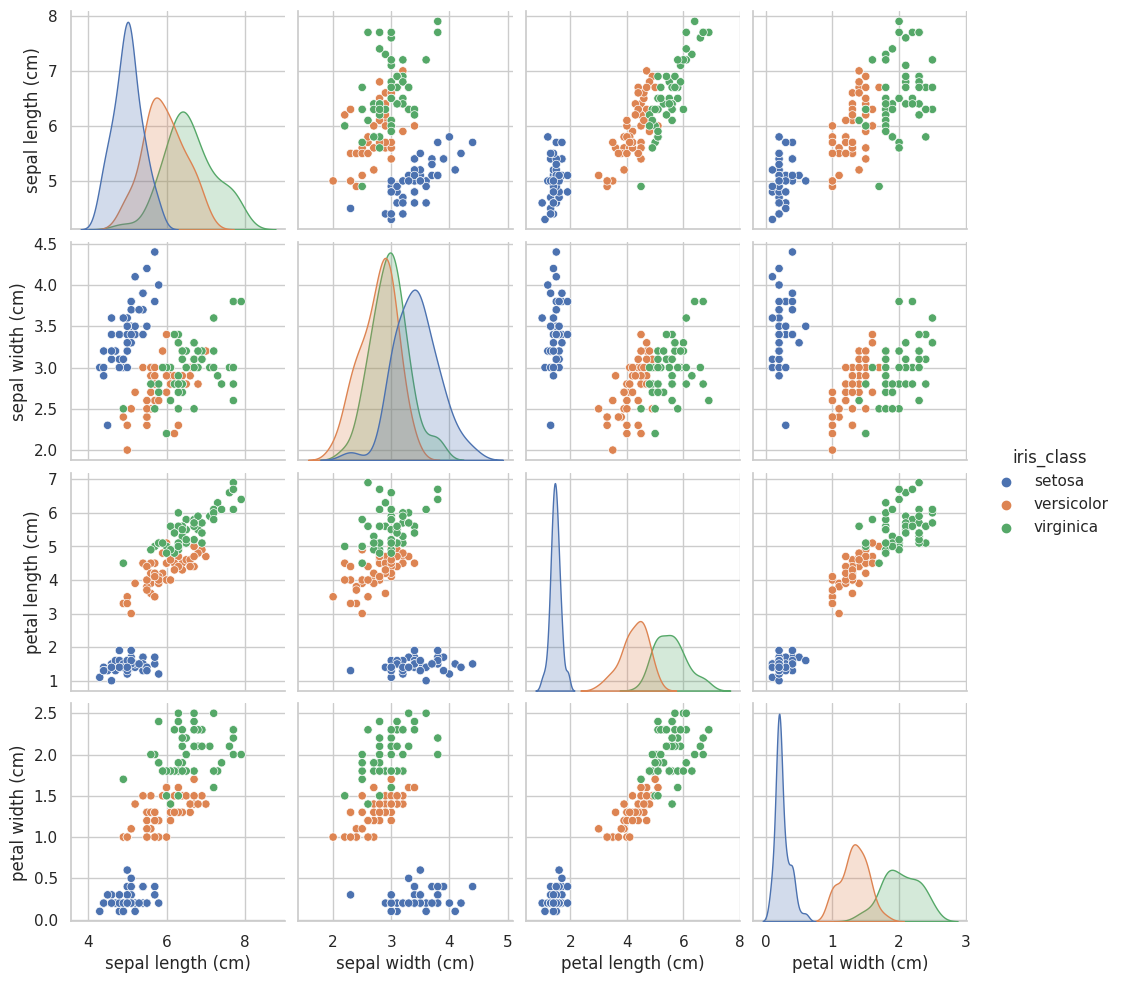

In [ ]:
sns.pairplot(df, hue="iris_class")
plt.show()

<ipython-input-12-e223cc3a7dff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


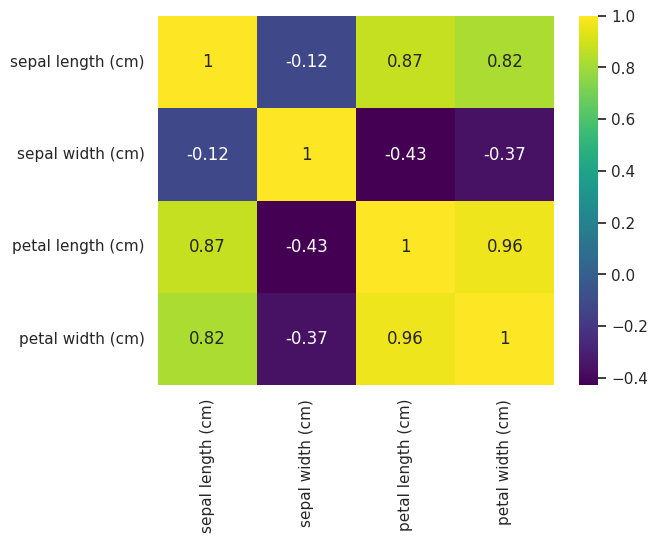

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()


<ipython-input-17-3e615b734928>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


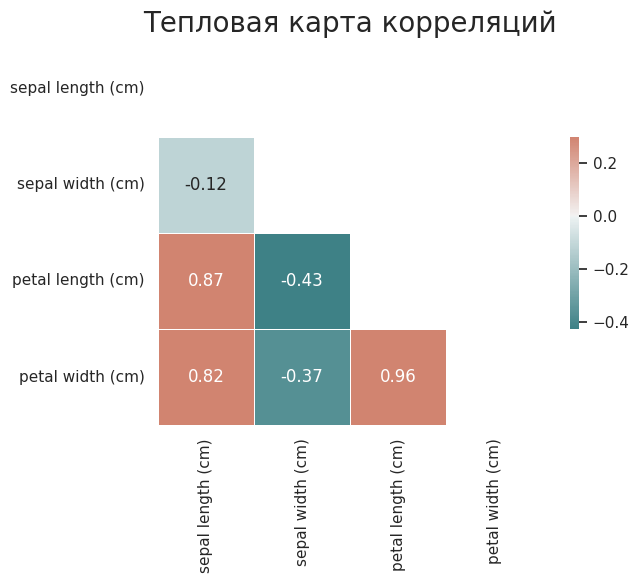

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="white")

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(200, 20, as_cmap=True)

plt.figure(figsize=(7, 5))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Тепловая карта корреляций', fontsize=20)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка и подготовка данных
iris = load_iris ()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['iris_class'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Разделение данных на признаки и целевую переменную
X = df.iloc[:, :-1]
y = df['iris_class']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение моделей
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Оценка моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

print("Accuracy:", accuracy_log_reg)
print("R:", report_rf)

Accuracy: 1.0
R:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
X_train_scaled

array([[-0.4134164 , -1.46200287, -0.09951105, -0.32339776],
       [ 0.55122187, -0.50256349,  0.71770262,  0.35303182],
       [ 0.67180165,  0.21701605,  0.95119225,  0.75888956],
       [ 0.91296121, -0.02284379,  0.30909579,  0.2177459 ],
       [ 1.63643991,  1.41631528,  1.30142668,  1.70589097],
       [-0.17225683, -0.26270364,  0.19235097,  0.08245999],
       [ 2.11875905, -0.02284379,  1.59328871,  1.16474731],
       [-0.29283662, -0.02284379,  0.36746819,  0.35303182],
       [-0.89573553,  1.17645543, -1.44207638, -1.40568508],
       [ 2.23933883, -0.50256349,  1.65166111,  1.0294614 ],
       [-0.05167705, -0.74242333,  0.13397857, -0.32339776],
       [-0.77515575,  0.93659559, -1.44207638, -1.40568508],
       [-1.01631531,  1.17645543, -1.50044878, -1.27039917],
       [-0.89573553,  1.89603497, -1.15021435, -1.13511325],
       [-1.01631531, -2.42144225, -0.21625586, -0.32339776],
       [ 0.55122187, -0.74242333,  0.60095781,  0.75888956],
       [-1.25747488,  0.

In [ ]:
X_test_scaled


array([[ 0.3100623 , -0.50256349,  0.484213  , -0.05282593],
       [-0.17225683,  1.89603497, -1.26695916, -1.27039917],
       [ 2.23933883, -0.98228318,  1.76840592,  1.43531914],
       [ 0.18948252, -0.26270364,  0.36746819,  0.35303182],
       [ 1.15412078, -0.50256349,  0.54258541,  0.2177459 ],
       [-0.53399618,  0.93659559, -1.38370397, -1.13511325],
       [-0.29283662, -0.26270364, -0.15788346,  0.08245999],
       [ 1.27470056,  0.21701605,  0.71770262,  1.43531914],
       [ 0.43064208, -1.94172256,  0.36746819,  0.35303182],
       [-0.05167705, -0.74242333,  0.01723376, -0.05282593],
       [ 0.79238143,  0.4568759 ,  0.71770262,  1.0294614 ],
       [-1.25747488, -0.02284379, -1.44207638, -1.540971  ],
       [-0.4134164 ,  1.17645543, -1.50044878, -1.40568508],
       [-1.1368951 ,  0.21701605, -1.38370397, -1.540971  ],
       [-0.89573553,  1.89603497, -1.38370397, -1.27039917],
       [ 0.55122187,  0.69673574,  0.484213  ,  0.48831773],
       [ 0.79238143, -0.